In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dia = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
dia

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
#### Age is an important factor as diabetes is more commonly diagnosed in older adults.
#### Hypertension and Heart disease has 2 classses. 0 and 1 implying that whether the person has the medical condition or not.
#### Smoking history is also considered a risk factor for diabetes.
#### BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.
#### HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.Higher this level, there is a increased risk of diabetes.
#### Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

## Exploratory data analysis

In [4]:
dia.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
dia.shape

(100000, 9)

In [7]:
dia.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
dia.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [9]:
dia['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
dia['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [11]:
dia.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
print(dia.duplicated())
print(dia.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
3854


In [13]:
df = dia[['bmi','smoking_history','diabetes']]

In [14]:
df

,bmi,smoking_history,diabetes
0,25.19,never,0
1,27.32,No Info,0
2,27.32,never,0
3,23.45,current,0
4,20.14,current,0
...,...,...,...
99995,27.32,No Info,0
99996,17.37,No Info,0
99997,27.83,former,0
99998,35.42,never,0


In [15]:
df1 = df[df['smoking_history']=='current']

In [16]:
df1

,bmi,smoking_history,diabetes
3,23.45,current,0
4,20.14,current,0
20,36.38,current,0
32,22.01,current,0
38,27.32,current,1
...,...,...,...
99939,21.81,current,0
99942,30.16,current,0
99979,30.11,current,1
99991,29.65,current,0


In [17]:
df2 = df[df['bmi']>30]
df2

,bmi,smoking_history,diabetes
8,33.64,never,0
11,54.70,former,0
12,36.05,former,0
16,30.36,never,0
20,36.38,current,0
...,...,...,...
99979,30.11,current,1
99982,30.04,never,0
99992,34.34,never,0
99993,40.69,never,0


In [18]:
y = dia['blood_glucose_level']
x = dia['diabetes']

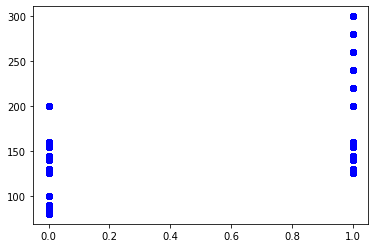

In [19]:
plt.scatter(x, y, c ="blue")

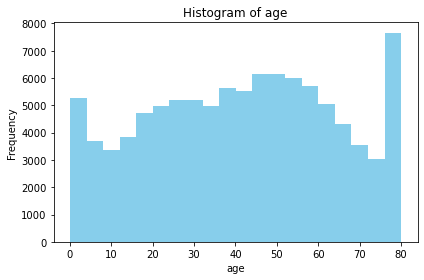

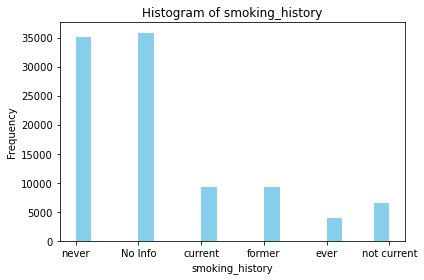

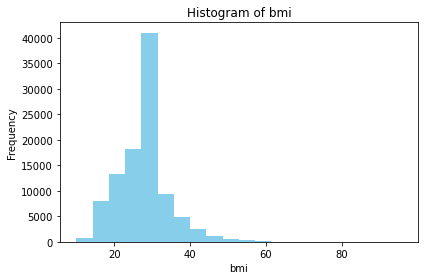

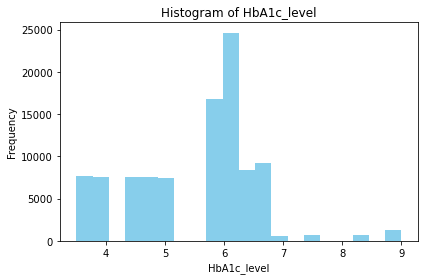

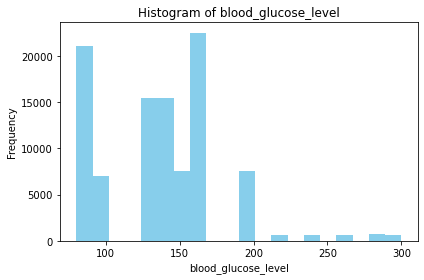

In [20]:
features = [ 'age', 'smoking_history',
            'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in features:
    plt.figure(figsize=(6, 4))  
    plt.hist(dia[feature], bins=20, color='skyblue')  
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

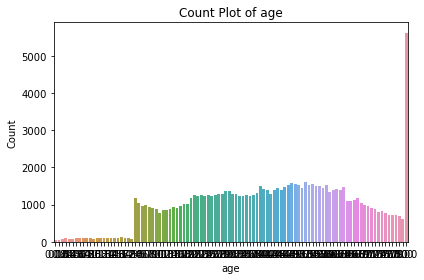

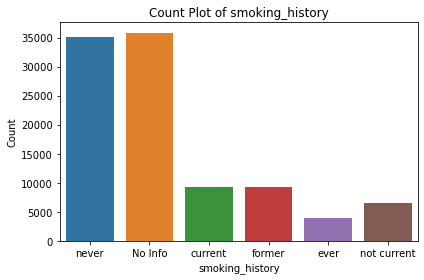

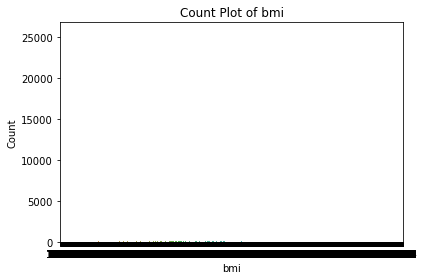

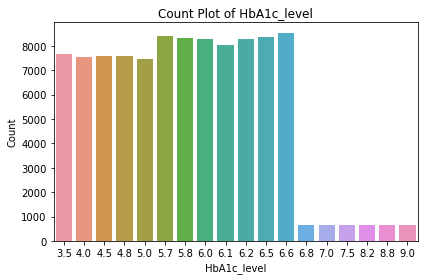

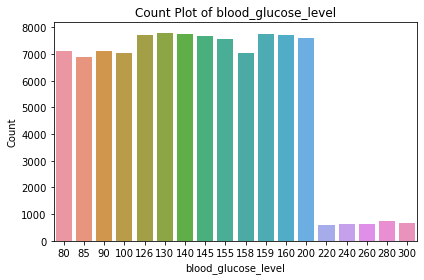

In [21]:
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.countplot(data=dia, x=feature) 
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [22]:
dia['bmi'].min(),dia['bmi'].max()

(10.01, 95.69)

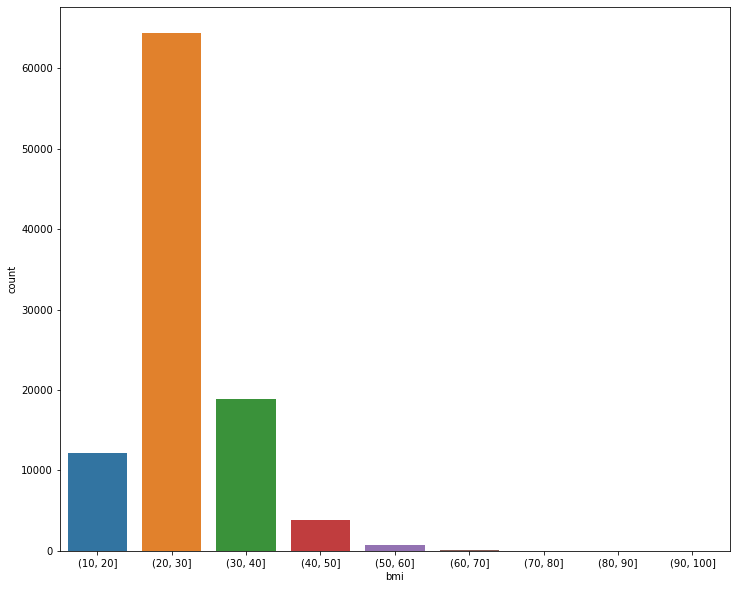

In [23]:
bmi_group= pd.cut(dia['bmi'], bins = [10,20,30,40,50,60,70,80,90,100])
plt.figure(figsize=(12,10))
sns.countplot(x=bmi_group,data=dia)
plt.show()

In [24]:
dia['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

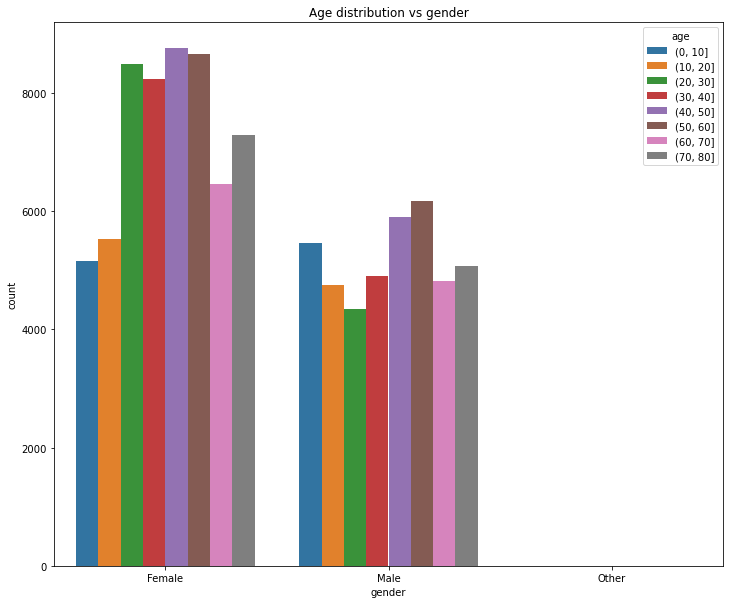

In [25]:
age_group = pd.cut(dia['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12,10))
sns.countplot(x=dia['gender'],data=dia,hue=age_group)
plt.title('Age distribution vs gender')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
dia_encoded = dia.copy()
label_encoder = LabelEncoder()

for column in dia_encoded.select_dtypes(include='object'):
    dia_encoded[column] = label_encoder.fit_transform(dia_encoded[column])

dia_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


<AxesSubplot:>

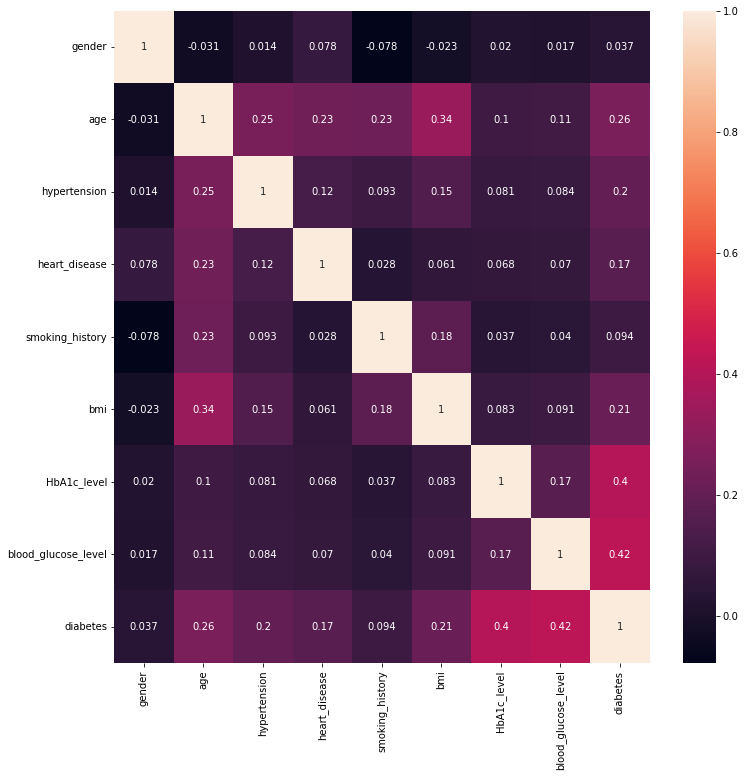

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(dia_encoded.corr(), annot=True)

## Model Building

In [61]:
x = dia_encoded.drop(columns=['diabetes'])  
y = dia_encoded['diabetes']  

In [63]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x, y)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

#### Logistic Regression

In [76]:
model=LogisticRegression().fit(x_balanced,y_balanced)

In [77]:
pred_test = model.predict(x_test)

In [78]:
print(accuracy_score(y_test, pred_test))

0.8857650273224044


In [79]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18293
           1       0.89      0.88      0.89     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



#### Decision Tree

In [84]:
d_tree = DecisionTreeClassifier()

d_tree.fit(x_balanced, y_balanced)
y_pred = d_tree.predict(x_test)
print(accuracy_score(y_test, ypred))

0.9994535519125683


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18293
           1       1.00      1.00      1.00     18307

    accuracy                           1.00     36600
   macro avg       1.00      1.00      1.00     36600
weighted avg       1.00      1.00      1.00     36600



#### Random Forest

In [86]:
rforest = RandomForestClassifier()
rforest.fit(x_balanced, y_balanced)
ypred = rforest.predict(x_test)
print(accuracy_score(y_test, ypred))

0.9993989071038252


In [87]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18293
           1       1.00      1.00      1.00     18307

    accuracy                           1.00     36600
   macro avg       1.00      1.00      1.00     36600
weighted avg       1.00      1.00      1.00     36600



#### K Nearest Neighbors

In [101]:
knn = KNeighborsClassifier()
knn.fit(x_balanced, y_balanced)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18293
           1       0.93      0.99      0.96     18307

    accuracy                           0.96     36600
   macro avg       0.96      0.96      0.96     36600
weighted avg       0.96      0.96      0.96     36600



#### All models have high level of accuracy. Lets check whether it predicts a sample data. 

#### Checking the accuracy of prediction

In [105]:
random_sample = dia_encoded.sample(n=20, random_state=25)

x_sample = random_sample.drop("diabetes", axis=1)
y_sample = random_sample["diabetes"]

In [106]:
pred_sample = knn.predict(x_sample)

In [107]:
predict = pd.DataFrame({"Actual": y_sample, "Predicted": pred_sample})

In [108]:
predict

,Actual,Predicted
43469,0,0
20973,1,1
42833,0,0
1568,0,0
83899,0,0
89927,1,1
63952,0,0
66920,0,0
31117,0,0
54037,0,0


#### We can see that the model is predicting 19/20 records correctly.